# 실습종합문제2. 팁데이터분석

### 시각화를 통한 EDA  & 그룹별 분석

### 1. 필요 모듈 임포트

In [1]:
# 넘파이, 판다스, 플롯관련 패키지 모듈
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 경고무시
import warnings
warnings.filterwarnings('ignore')

In [3]:
# 그래프 한글 표시 설정
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':  # 맥OS 
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':  # 윈도우
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...  sorry~~~')

### 예제데이터 로딩

#### 식당에서 식사 후 내는 팁(tip)과 관련된 데이터 : tips

- seaborn 패키지 내 tips 데이터셋 사용

    - total_bill: 식사대금

    - tip: 팁

    - sex: 성별

    - smoker: 흡연/금연 여부

    - day: 요일

    - time: 시간

    - size: 인원

In [4]:
tips = sns.load_dataset("tips")

### 2. 데이터 탐색

#### 1) 데이터의 앞부분과 뒷부분 확인

In [5]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [6]:
tips.tail()

,total_bill,tip,sex,smoker,day,time,size
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


#### 2) 변수 정보 확인

In [7]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


#### 3) 데이터 크기

In [8]:
tips.shape

(244, 7)

In [9]:
tips.size

1708

#### 4) 변수별 기술통계 계산

In [10]:
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


#### 5) 수치형 변수들에 대하여 히스토그램으로 시각화

- matplotlib.pyplot의 히스토그램 함수로 그리기

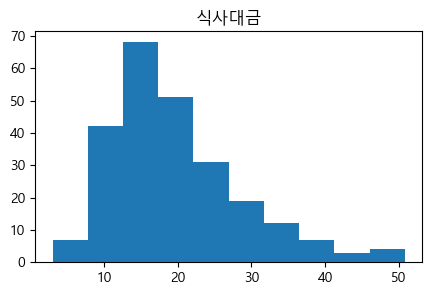

In [11]:
plt.figure(figsize=(5,3))
plt.hist(tips.total_bill)
plt.title('식사대금')
plt.show()

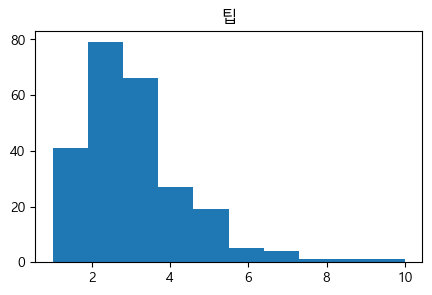

In [12]:
plt.figure(figsize=(5,3))
plt.hist(tips.tip)
plt.title('팁')
plt.show()

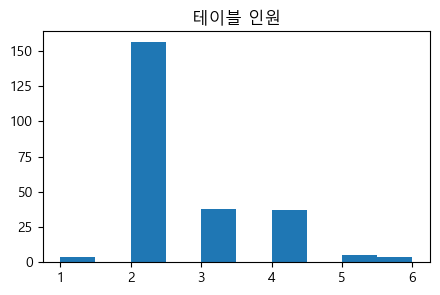

In [13]:
plt.figure(figsize=(5,3))
plt.hist(tips['size'])
plt.title('테이블 인원')
plt.show()

- pandas DataFrame의 plot()을 이용하여 히스토그램 함수로 그리기

<AxesSubplot:title={'center':'식사대금'}, ylabel='Frequency'>

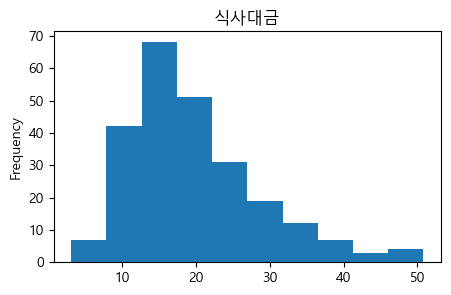

In [14]:
tips.total_bill.plot(kind='hist', figsize=(5,3), title='식사대금')

<AxesSubplot:title={'center':'팁'}, ylabel='Frequency'>

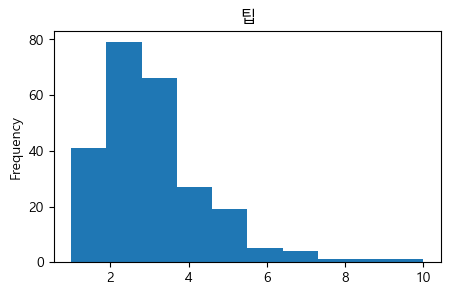

In [15]:
tips.tip.plot(kind='hist', figsize=(5,3), title='팁')

<AxesSubplot:title={'center':'테이블 인원'}, ylabel='Frequency'>

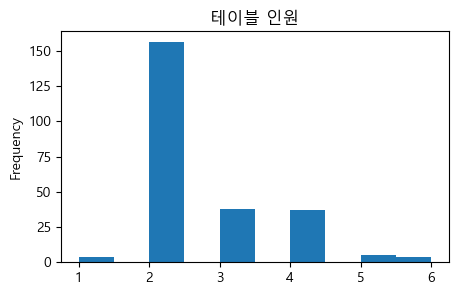

In [16]:
tips['size'].plot(kind='hist', figsize=(5,3), title='테이블 인원')

#### 6) 팁과 식사대금에 대한 박스플롯 그리기

- matplotlib.pyplot의 박스플롯 함수 이용
    - 이상치가 있는 경우 모양과 색을 파란색으로 표시하고, x축 tick을 변수이름으로 변경하기

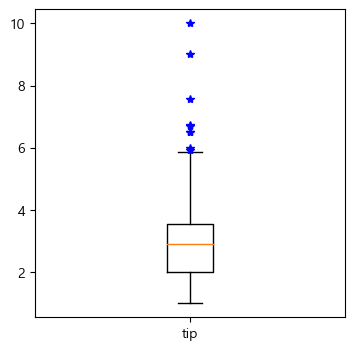

In [17]:
plt.figure(figsize=(4,4))
plt.boxplot(tips['tip'], sym='b*')
plt.xticks([1],['tip'])
plt.show()

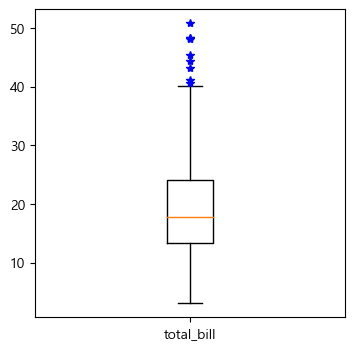

In [18]:
plt.figure(figsize=(4,4))
plt.boxplot(tips['total_bill'], sym='b*')
plt.xticks([1],['total_bill'])
plt.show()

#### 7) 성별 인원수는?

In [19]:
tips['sex'].value_counts()

Male      157
Female     87
Name: sex, dtype: int64

#### 8) 식사 대금 대비 팁의 비율이 가장 높은 요일과 시간대는 언제인가?

- 파생변수 생성 : 식사대금 대비 팁의 비율(tip_pt)
    - tip_pt = 팁 / 식사대금

In [20]:
tips['tip_pt'] = tips['tip']/tips['total_bill']
tips

,total_bill,tip,sex,smoker,day,time,size,tip_pt
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780
4,24.59,3.61,Female,No,Sun,Dinner,4,0.146808
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,0.203927
240,27.18,2.00,Female,Yes,Sat,Dinner,2,0.073584
241,22.67,2.00,Male,Yes,Sat,Dinner,2,0.088222
242,17.82,1.75,Male,No,Sat,Dinner,2,0.098204


In [21]:
tips['tip_pt'].describe()

count    244.000000
mean       0.160803
std        0.061072
min        0.035638
25%        0.129127
50%        0.154770
75%        0.191475
max        0.710345
Name: tip_pt, dtype: float64

In [22]:
tips[tips['tip_pt'] == tips['tip_pt'].max()]

,total_bill,tip,sex,smoker,day,time,size,tip_pt
172,7.25,5.15,Male,Yes,Sun,Dinner,2,0.710345


#### 9) 식사 대금 대비 팁의 비율이 가장 낮은 요일과 시간대는 언제인가?

In [23]:
tips[tips['tip_pt'] == tips['tip_pt'].min()]

,total_bill,tip,sex,smoker,day,time,size,tip_pt
237,32.83,1.17,Male,Yes,Sat,Dinner,2,0.035638


### 3. 그룹별 분석

#### 1) 성별에 따른 변수별 데이터 수는?

In [24]:
s_gr = tips.groupby('sex')

In [25]:
s_gr.count()

,total_bill,tip,smoker,day,time,size,tip_pt
sex,,,,,,,
Male,157,157,157,157,157,157,157
Female,87,87,87,87,87,87,87


#### 2) 성별에 따른 평균 팁(tip)

In [26]:
s_gr['tip'].mean()

sex
Male      3.089618
Female    2.833448
Name: tip, dtype: float64

#### 3) 성별에 따른 평균 팁비율(tip_pt)

In [27]:
s_gr['tip_pt'].mean()

sex
Male      0.157651
Female    0.166491
Name: tip_pt, dtype: float64

#### 4) 성별에 따른 흡연 유무 인원수는?

In [28]:
s_gr['smoker'].value_counts()

sex        
Male    No     97
        Yes    60
Female  No     54
        Yes    33
Name: smoker, dtype: int64

In [29]:
tips['count'] = 1

In [30]:
s_s_gr = tips.groupby(['sex','smoker'])
s_s_gr['count'].count()

sex     smoker
Male    Yes       60
        No        97
Female  Yes       33
        No        54
Name: count, dtype: int64

#### 5) 흡연 유무에 따른 성별 인원을 피봇테이블로 작성

- 피봇테이블 함수 형식
- dataFrame.pivot_table('집계함수적용할컬럼명', index='행인덱스가될컬럼명',
columns = '열인덱스가될컬럼명', aggfunc='집계함수명')

In [31]:
tips.pivot_table(index='sex', columns='smoker', values='count', aggfunc='sum')

smoker,Yes,No
sex,,
Male,60,97
Female,33,54


#### 6) 흡연 유무에 따른 팁 비율의 평균

In [32]:
smoker_gr = tips.groupby('smoker')
smoker_gr['tip_pt'].mean()

smoker
Yes    0.163196
No     0.159328
Name: tip_pt, dtype: float64

#### 7) 성별과 흡연 유무에 따른 팁 비율의 평균

In [33]:
s_s_gr = tips.groupby(['sex','smoker'])
s_s_gr['tip_pt'].mean()

sex     smoker
Male    Yes       0.152771
        No        0.160669
Female  Yes       0.182150
        No        0.156921
Name: tip_pt, dtype: float64

- 성별과 흡연유무에 따라 팁비율이 어떻게 다른가?

--> 유의미한 관계 없음..?

#### 8) 성별과 흡연유무에 따른 팁비율에 대하여 평균 이외의 통계량도 확인

In [34]:
s_s_gr['tip_pt'].describe()

count      mean       std       min       25%       50%  \
sex    smoker                                                            
Male   Yes      60.0  0.152771  0.090588  0.035638  0.101845  0.141015   
       No       97.0  0.160669  0.041849  0.071804  0.131810  0.157604   
Female Yes      33.0  0.182150  0.071595  0.056433  0.152439  0.173913   
       No       54.0  0.156921  0.036421  0.056797  0.139708  0.149691   

                    75%       max  
sex    smoker                      
Male   Yes     0.191697  0.710345  
       No      0.186220  0.291990  
Female Yes     0.198216  0.416667  
       No      0.181630  0.252672

#### 9) 요일별 팁 합계를 계산한 데이터프레임 생성

In [35]:
day_gr = tips.groupby('day')

In [36]:
day_tip = pd.DataFrame(day_gr['tip'].sum())
day_tip

,tip
day,
Thur,171.83
Fri,51.96
Sat,260.40
Sun,247.39


- 데이터프레임 인덱스를 재설정하되 기존 인덱스를 삭제하지 말기

In [37]:
day_tip = day_tip.reset_index()
day_tip

,day,tip
0,Thur,171.83
1,Fri,51.96
2,Sat,260.40
3,Sun,247.39


- 요일별 팁합계를 막대그래프로 생성

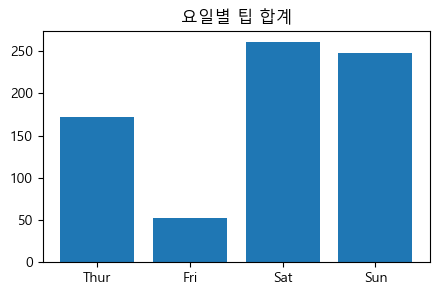

In [38]:
plt.figure(figsize=(5,3))
plt.bar(day_tip.day, day_tip.tip)
plt.title('요일별 팁 합계')
plt.show()

#### 10) 요일과 성별에 따른 팁의 합계 계산한 결과를 데이터프레임으로 생성

In [39]:
d_s_gr = tips.groupby(['day','sex'])
d_s = pd.DataFrame(d_s_gr['tip'].sum())

- 생성한 데이터프레임의 인덱스를 다시 설정하되, 기존 인덱스는 생략하지 않는다

In [40]:
d_s = d_s.reset_index()

- 생성한 데이터프레임을 확인

In [41]:
d_s

,day,sex,tip
0,Thur,Male,89.41
1,Thur,Female,82.42
2,Fri,Male,26.93
3,Fri,Female,25.03
4,Sat,Male,181.95
5,Sat,Female,78.45
6,Sun,Male,186.78
7,Sun,Female,60.61


#### 11) 10)번에서 생성한 데이터프레임을 가지고 요일과 성별에 따라 내림차순으로 정렬한 뒤, 새로운 데이터프레임으로 저장하고 확인

In [42]:
d_s2 = d_s.sort_values(by=['day', 'sex'], ascending=False)
d_s2

,day,sex,tip
7,Sun,Female,60.61
6,Sun,Male,186.78
5,Sat,Female,78.45
4,Sat,Male,181.95
3,Fri,Female,25.03
2,Fri,Male,26.93
1,Thur,Female,82.42
0,Thur,Male,89.41


#### 12) 11)번에서 생성한 데이터프레임에 요일 그룹으로 팁의 누적합을 계산한 변수 tip_cumsum을 추가

In [43]:
day_gr2 = d_s2.groupby('day')

In [44]:
d_s2['tip_cumsum'] = day_gr2['tip'].cumsum()

In [45]:
d_s2

,day,sex,tip,tip_cumsum
7,Sun,Female,60.61,60.61
6,Sun,Male,186.78,247.39
5,Sat,Female,78.45,78.45
4,Sat,Male,181.95,260.40
3,Fri,Female,25.03,25.03
2,Fri,Male,26.93,51.96
1,Thur,Female,82.42,82.42
0,Thur,Male,89.41,171.83


#### 13) 12)번에서 생성한 데이터프레임을 요일과 성별에 따라 오름차순을 정렬하여 새로운 데이터프레임으로 저장

In [46]:
d_s3 = d_s2.sort_values(by=['day','sex'])
d_s3

,day,sex,tip,tip_cumsum
0,Thur,Male,89.41,171.83
1,Thur,Female,82.42,82.42
2,Fri,Male,26.93,51.96
3,Fri,Female,25.03,25.03
4,Sat,Male,181.95,260.40
5,Sat,Female,78.45,78.45
6,Sun,Male,186.78,247.39
7,Sun,Female,60.61,60.61


- 이 데이터프레임에서 요일과 성별에 따른 팁을 비교하기 위한 막대그래프를 생성

In [47]:
d_s3_gr = d_s3.set_index(['day','sex'])

<AxesSubplot:xlabel='day,sex'>

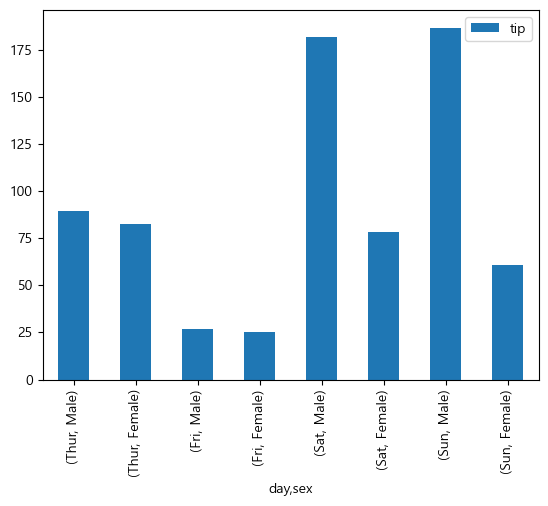

In [48]:
d_s3_gr.plot(kind='bar', y='tip')

#### 14) 요일별 식사대금 분포에 대한 박스플롯 그리기

In [49]:
sun_total = tips[tips['day'] == 'Sun'].total_bill
fri_total = tips[tips['day'] == 'Fri'].total_bill
sat_total = tips[tips['day'] == 'Sat'].total_bill
thur_total = tips[tips['day'] == 'Thur'].total_bill

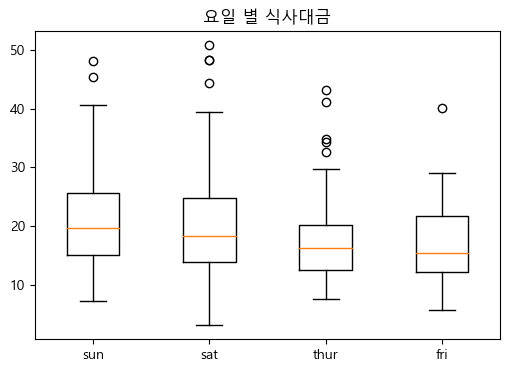

In [50]:
plt.figure(figsize = (6,4))
plt.boxplot([sun_total,sat_total, thur_total,fri_total])
plt.title('요일 별 식사대금')
plt.xticks([1,2,3,4],['sun','sat', 'thur','fri'])
plt.show()

#### 15) 요일별 팁 분포에 대한 박스플롯 그리기

In [51]:
sun_tip = tips[tips['day'] == 'Sun'].tip
fri_tip = tips[tips['day'] == 'Fri'].tip
sat_tip = tips[tips['day'] == 'Sat'].tip
thur_tip = tips[tips['day'] == 'Thur'].tip

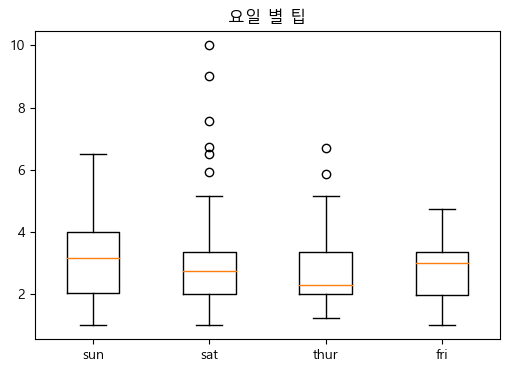

In [52]:
plt.figure(figsize = (6,4))
plt.boxplot([sun_tip,sat_tip, thur_tip,fri_tip])
plt.title('요일 별 팁')
plt.xticks([1,2,3,4],['sun','sat', 'thur','fri'])
plt.show()

#### 16) 요일과 흡연유무에 따른 팁 분포에 대한 박스플롯 그리기

In [53]:
tips_dst = tips.loc[:,['day','smoker','tip']]

In [54]:
dst_gr = tips_dst.groupby(['day','smoker'])

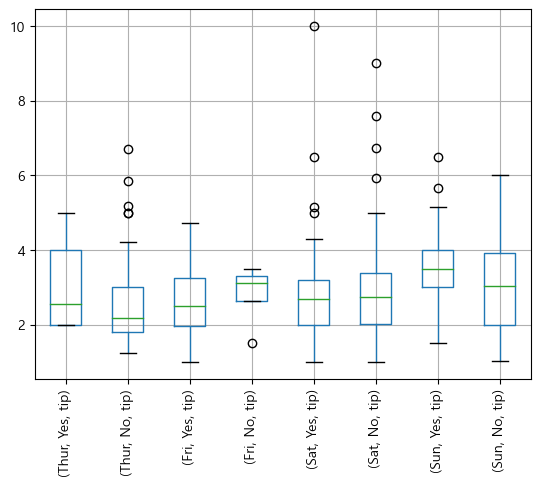

In [55]:
dst_gr.boxplot('tip')
plt.xticks(rotation='vertical')
plt.show()

#### 17) 요일과 흡연유무에 따른 식사대금 분포에 대한 박스플롯 그리기

In [56]:
tips_dsb = tips.loc[:,['day','smoker','total_bill']]

In [57]:
dsb_gr = tips_dsb .groupby(['day','smoker'])

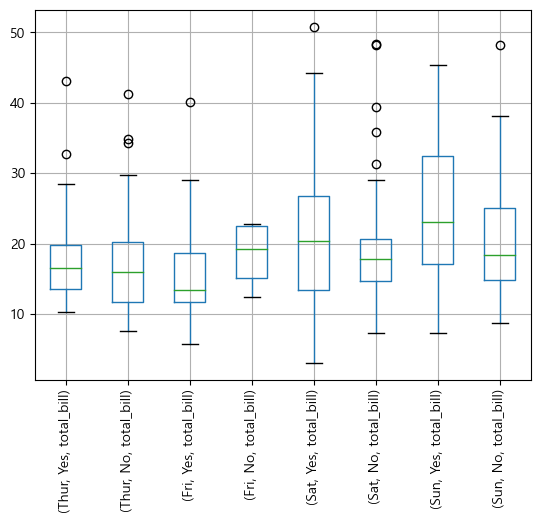

In [58]:
dsb_gr.boxplot('total_bill')
plt.xticks(rotation='vertical')
plt.show()

#### 18) 요일과 성별에 따른 식사대금 분포에 대한 박스플롯 그리기

In [59]:
tips_dsxb = tips.loc[:,['day','sex','total_bill']]

In [60]:
dsxb_gr = tips_dsxb .groupby(['day','sex'])

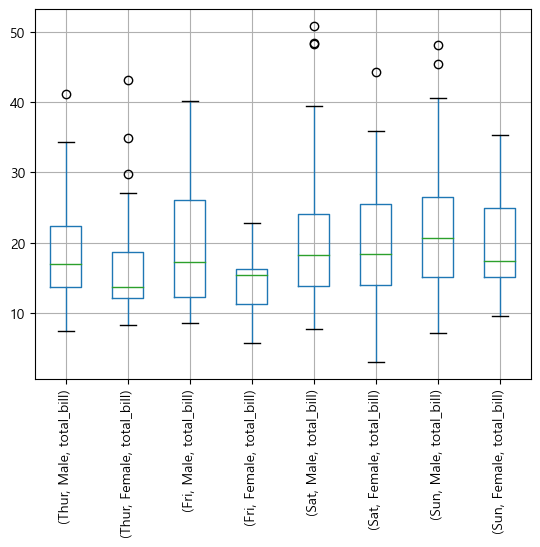

In [61]:
dsxb_gr.boxplot('total_bill')
plt.xticks(rotation='vertical')
plt.show()

#### 19) 요일과 성별에 따른 팁 분포에 대한 박스플롯 그리기

In [62]:
tips_dsxt = tips.loc[:,['day','sex','tip']]

In [63]:
dsxt_gr = tips_dsxt.groupby(['day','sex'])

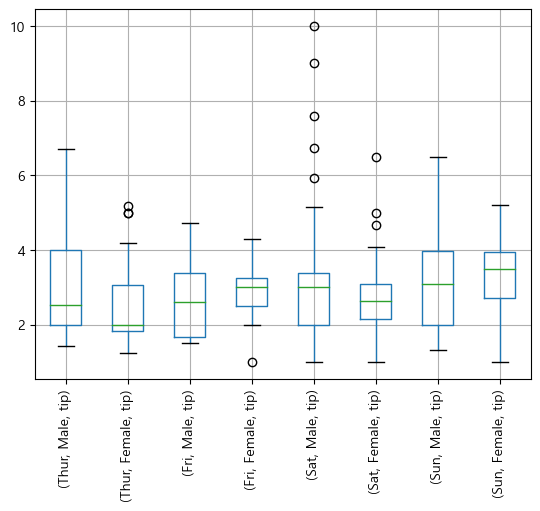

In [64]:
dsxt_gr.boxplot('tip')
plt.xticks(rotation='vertical')
plt.show()

#### 20) 11)번에서 생성한 데이터프레임을 행은 요일, 열은 성별로 구성된 피봇테이블 생성

- 판다스의 pivot() 함수 사용하여 적용

In [65]:
d_s_pivot = d_s.pivot_table(index='day', columns='sex', values='tip')
d_s_pivot

sex,Male,Female
day,,
Thur,89.41,82.42
Fri,26.93,25.03
Sat,181.95,78.45
Sun,186.78,60.61


#### 21) 20번에서 생성한 데이터프레임으로 요일과 성별에 따른 팁합계의 누적막대그래프 그리기

- 판다스의 데이터프레임에서 제공되는 plot()함수를 이용하여 그리기

<AxesSubplot:xlabel='day'>

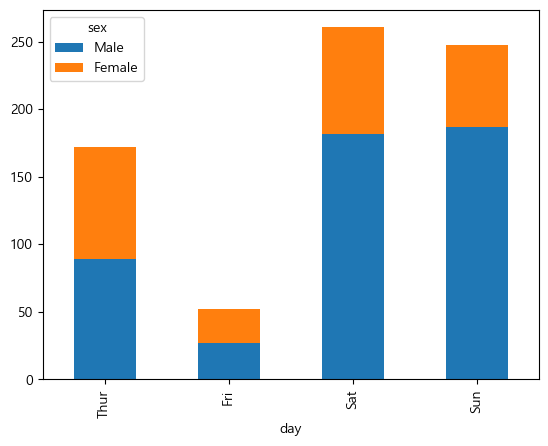

In [66]:
d_s_pivot.plot(kind='bar', stacked=True)

#### 22) 식사대금과 팁에 대한 산점도를 그리시오

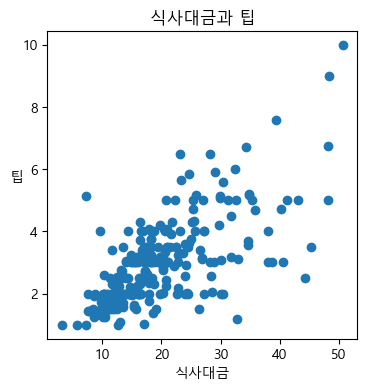

In [110]:
plt.figure(figsize=(4,4))
plt.scatter(tips.total_bill, tips.tip)
plt.title('식사대금과 팁')
plt.xlabel('식사대금')
plt.ylabel('팁', rotation=0)
plt.show()

#### 23) 식사대금과 팁에 대한 산점도에서 성별을 다른 색으로 구분하여 표시

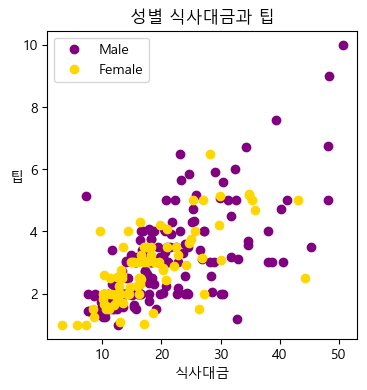

In [111]:
plt.figure(figsize=(4,4))
plt.scatter(tips[tips['sex']=='Male'].total_bill, tips[tips['sex']=='Male'].tip, label='Male', c='purple')
plt.scatter(tips[tips['sex']=='Female'].total_bill, tips[tips['sex']=='Female'].tip, label='Female', c='gold')
plt.title('성별 식사대금과 팁')
plt.xlabel('식사대금')
plt.ylabel('팁', rotation=0)
plt.legend()
plt.show()

#### 24) 식사대금과 팁에 대한 산점도에서 요일을 다른 색으로 구분하여 표시

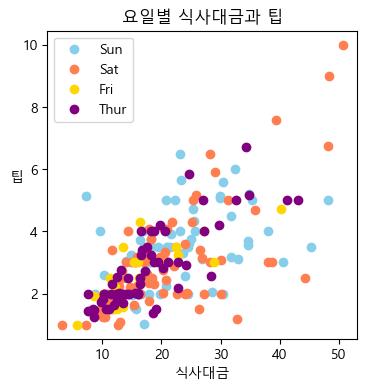

In [112]:
plt.figure(figsize=(4,4))
plt.scatter(tips[tips['day']=='Sun'].total_bill, tips[tips['day']=='Sun'].tip, label='Sun', c='skyblue')
plt.scatter(tips[tips['day']=='Sat'].total_bill, tips[tips['day']=='Sat'].tip, label='Sat', c='coral')
plt.scatter(tips[tips['day']=='Fri'].total_bill, tips[tips['day']=='Fri'].tip, label='Fri', c='gold')
plt.scatter(tips[tips['day']=='Thur'].total_bill, tips[tips['day']=='Thur'].tip, label='Thur', c='purple')
plt.title('요일별 식사대금과 팁')
plt.xlabel('식사대금')
plt.ylabel('팁', rotation=0)
plt.legend()
plt.show()

------------------------------------------------